In [1]:
import numpy as np
import h5py
import glob
import sys
import os
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistic
import scipy.stats
import scipy.optimize

In [2]:
df = pd.read_pickle(
    "output/" +
    "cube_2pop_psi_0.5_omega_0.0_vref_0.025_length_12.5.analysis.pkl")

In [10]:
ref = 'r'
df_analyse = pd.DataFrame()
for m, m_group in df.groupby('model'):
    for o, o_group in m_group.groupby('omega'):
        for r, r_group in o_group.groupby('resolution'):
            df_ = pd.DataFrame()
            for vs, vs_group in r_group.groupby('voxel_size'):

                n = np.array(vs_group['direction_ref_' + ref].iloc[0]).size

                dirc = statistic._remap_direction_sym(
                    np.array(vs_group['direction_ref_' + ref].iloc[0]) -
                    np.array(vs_group['direction'].iloc[0]))

                df_ = df_.append(
                    pd.DataFrame({
                        "voxel_size": [float(vs)] * n,
                        "resolution": [float(r)] * n,
                        "model": [m] * n,
                        "omega": [float(o)] * n,
                        "diff_dir":
                            np.rad2deg(dirc),
                        "diff_ret":
                            np.array(
                                vs_group['retardation_ref_' + ref].iloc[0]) -
                            np.array(vs_group['retardation'].iloc[0]),
                        "diff_trans":
                            np.array(vs_group['transmittance_ref_' +
                                              ref].iloc[0]) -
                            np.array(vs_group['transmittance'].iloc[0])
                    }))
            df_analyse = df_analyse.append(df_)

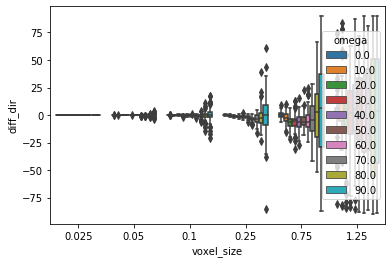

In [11]:
sns.boxplot(x='voxel_size',
            y='diff_dir',
            hue='omega',
            data=df_analyse[(df_analyse.model == 'r') &
                            (df_analyse.resolution == 1.25)])

In [12]:
df_analyse[(df_analyse.model == 'r') &
                            (df_analyse.resolution == 1.25)&(df_analyse.omega == 90)] == df_analyse[(df_analyse.model == 'r') &
                            (df_analyse.resolution == 1.25)&(df_analyse.omega == 0)]

,voxel_size,resolution,model,omega,diff_dir,diff_ret,diff_trans
0,True,True,True,False,True,True,True
1,True,True,True,False,True,True,True
2,True,True,True,False,True,True,True
3,True,True,True,False,True,True,True
4,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...
95,True,True,True,False,False,False,False
96,True,True,True,False,False,False,True
97,True,True,True,False,False,False,False
98,True,True,True,False,False,False,False
